In [2]:
import soundfile as sf
import sounddevice as sd
from scipy import signal as sg
import numpy as np
import matplotlib.pyplot as plt
from suaBibSignal import *
import time

In [3]:
#funcoes do filtro passa baixa
def filtro(y, samplerate, cutoff_hz):
  # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
    nyq_rate = samplerate/2
    width = 5.0/nyq_rate
    ripple_db = 60.0 #dB
    N , beta = sg.kaiserord(ripple_db, width)
    taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
    yFiltrado = sg.lfilter(taps, 1.0, y)
    return yFiltrado

def LPF(signal, cutoff_hz, fs):
        #####################
        # Filtro
        #####################
        # https://scipy.github.io/old-wiki/pages/Cookbook/FIRFilter.html
        nyq_rate = fs/2
        width = 5.0/nyq_rate
        ripple_db = 60.0 #dB
        N , beta = sg.kaiserord(ripple_db, width)
        taps = sg.firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))
        return(sg.lfilter(taps, 1.0, signal))

#funcao para transformada de fourier


In [55]:
#definindo constantes
fs = 44100
frequencia_portadora_AM = 14000
amplitude = 1
sinal = signalMeu() #instancia da classe signalMeu

In [130]:
sd.default.samplerate = 48000  # taxa de amostragem
sd.default.channels = 2  # numCanais # o numero de canais, tipicamente são 2. Placas com dois canais. Se ocorrer problemas pode tentar com 1. No caso de 2 canais, ao gravar um audio, terá duas listas
duration = 4  # tempo em segundos que ira aquisitar o sinal acustico captado pelo mic

# calcule o numero de amostras "numAmostras" que serao feitas (numero de aquisicoes) durante a gracação. Para esse cálculo você deverá utilizar a taxa de amostragem e o tempo de gravação
numAmostras = int(sd.default.samplerate * duration)

# faca um print na tela dizendo que a captacao comecará em n segundos. e entao
# use um time.sleep para a espera
t_espera = 2
print(f"a captacao comecará em {t_espera} segundos.")
time.sleep(t_espera)

# Ao seguir, faca um print informando que a gravacao foi inicializada
print("gravacao inicializada")

# para gravar, utilize
audio_recebido = sd.rec(int(numAmostras), 48000, channels=1)

sd.wait()
print("...     FIM")

sd.playrec(audio_recebido, 48000, channels=1)
sd.wait()

sf.write('soms/among_modulado_real.wav', audio_recebido, fs)


a captacao comecará em 2 segundos.
gravacao inicializada
...     FIM


audio demodulado [ 0.          0.         -0.         ... -0.03995217 -0.04648181
 -0.        ]


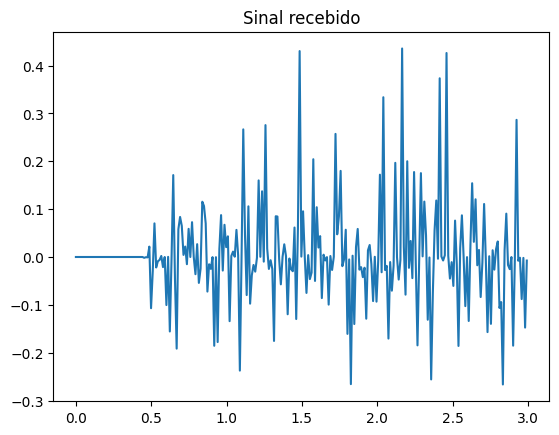

In [56]:
#Testando com audio ja modulado dentro do computador
audio_recebido, samplerate = sf.read('soms/audio_modulado_matheus.wav')

# print(audio_recebido[0: 10])

# for i in range(len(audio_recebido)):
#     audio_recebido[i] * 1000

# print(audio_recebido[0: 10])

audio_samples = len(audio_recebido)
duracao = audio_samples/fs
vetor_tempo = np.linspace(0, duracao, audio_samples)

#definindo a portadora
senoide_portadora = amplitude * np.sin(2*np.pi*frequencia_portadora_AM*vetor_tempo)

#demodulando o sinal com a portadora
audio_demodulado = senoide_portadora * audio_recebido

print('audio demodulado', audio_demodulado)

#Plotando o grafico do sinal demodulado pelo tempo
plt.plot(vetor_tempo[::500], audio_demodulado[::500])
plt.title("Sinal recebido")
plt.show()

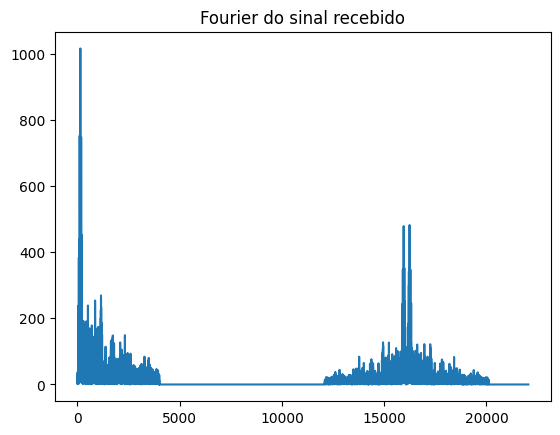

In [57]:
#Calculando a tranformada de fourier do sinal demodulado
xf, yf = sinal.calcFFT(audio_demodulado, fs)

plt.figure("F(y)")
plt.plot(xf, np.abs(yf))
plt.title("Fourier do sinal recebido")
plt.show()


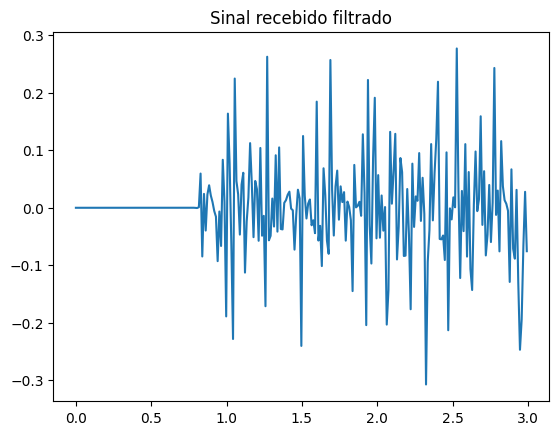

In [58]:
#Filtrando o sinal demodulado até 4000Hz
filtrado = filtro(audio_demodulado, fs, 4000)

plt.plot(vetor_tempo[::500], filtrado[::500])
plt.title("Sinal recebido filtrado")
plt.show()


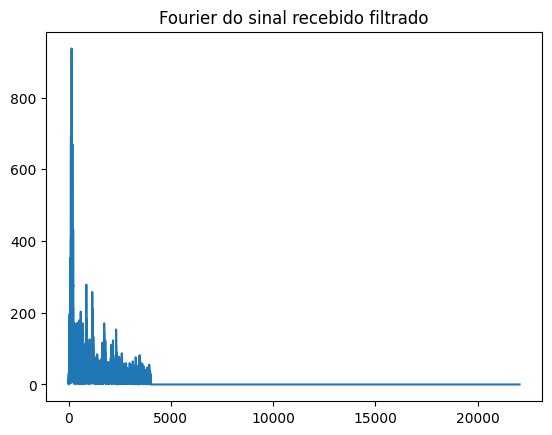

In [59]:
#Calculando a tranformada de fourier do sinal filtrado
xf_filtrado, yf_filtrado = sinal.calcFFT(filtrado, fs)

plt.figure("F(y) filtrado")
plt.plot(xf_filtrado, np.abs(yf_filtrado))
plt.title("Fourier do sinal recebido filtrado")
plt.show()

In [60]:
#Tocando o som filtrado
sd.play(filtrado, fs)
sd.wait()

#salvando audio filtrado
sf.write('soms/among_filtrado.wav', filtrado, fs)